Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [3]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:
transactions.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
transactions['date'].dtype

dtype('O')

In [7]:
# Question 1.
# GROUP BY DATE:
transactions['date'] = pd.to_datetime(transactions['date'], format= '%d.%m.%Y')

In [8]:
transactions['date'].dtype

dtype('<M8[ns]')

In [9]:
import pandas as pd
from datetime import date

date_from = pd.Timestamp(date(2014,9,1))
date_to = pd.Timestamp(date(2014,9,30))

transactions2 = transactions[
    (transactions['date'] >= date_from ) &
    (transactions['date'] <= date_to)
]
transactions2

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953691,2014-09-24,20,5,1039,899.00,1.0
1953692,2014-09-27,20,5,1015,449.00,1.0
1953693,2014-09-07,20,5,1329,399.00,1.0
1953694,2014-09-27,20,5,984,399.00,1.0
1953695,2014-09-08,20,5,984,399.00,1.0
1953696,2014-09-29,20,5,982,749.00,1.0
1953697,2014-09-05,20,5,972,299.00,1.0
1953698,2014-09-17,20,5,1010,299.00,1.0
1953699,2014-09-27,20,5,1041,899.00,1.0
1953700,2014-09-13,20,5,1249,299.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
# CALCULATING THE REVENUE AND ADDING IT TO TRANSACTIONS DF
transactions2['revenue'] = transactions2.item_price * transactions2.item_cnt_day

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
tg = transactions2.groupby('shop_id')
tg.first()

,date,date_block_num,item_id,item_price,item_cnt_day,revenue
shop_id,,,,,,
2,2014-09-30,20,7879,1990.00,1.0,1990.00
3,2014-09-01,20,2921,419.00,1.0,419.00
4,2014-09-02,20,21677,149.00,1.0,149.00
5,2014-09-24,20,1039,899.00,1.0,899.00
6,2014-09-27,20,77,149.00,1.0,149.00
7,2014-09-15,20,1306,299.00,1.0,299.00
10,2014-09-17,20,4231,1392.00,1.0,1392.00
12,2014-09-16,20,15777,749.00,1.0,749.00
14,2014-09-02,20,3851,899.00,1.0,899.00


In [12]:
#ADDING UP  THE REVENUE
Total = tg['revenue'].sum().max()
print (Total)

7982852.2


In [13]:
max_revenue = 7982852.2 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


In [14]:
# Question 2 -------------------------------------------
# Get transactions for months 6, 7, 8 in 2014. Once again make revenue column. Groupby item_id, sum the revenues and get item_id of max revenue.
import pandas as pd
from datetime import date

date_from = pd.Timestamp(date(2014,6,1))
date_to = pd.Timestamp(date(2014,8,31))

transactions_summer = transactions[
    (transactions['date'] >= date_from ) &
    (transactions['date'] <= date_to)
]
transactions_summer

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1705909,2014-06-15,17,26,9532,399.00,1.0
1705910,2014-06-10,17,26,9507,149.00,1.0
1705911,2014-06-13,17,26,9509,246.32,1.0
1705912,2014-06-03,17,26,9532,399.00,1.0
1705913,2014-06-08,17,26,9532,399.00,1.0
1705914,2014-06-11,17,26,9532,399.00,1.0
1705915,2014-06-25,17,26,9801,299.00,1.0
1705916,2014-06-09,17,26,9763,49.00,1.0
1705917,2014-06-19,17,26,9532,399.00,1.0
1705918,2014-06-20,17,26,9532,399.00,1.0


In [15]:
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [16]:
transactions_summer['revenue2'] = transactions_summer.item_price * transactions_summer.item_cnt_day

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
transactions_summer

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue2
1705909,2014-06-15,17,26,9532,399.00,1.0,399.00
1705910,2014-06-10,17,26,9507,149.00,1.0,149.00
1705911,2014-06-13,17,26,9509,246.32,1.0,246.32
1705912,2014-06-03,17,26,9532,399.00,1.0,399.00
1705913,2014-06-08,17,26,9532,399.00,1.0,399.00
1705914,2014-06-11,17,26,9532,399.00,1.0,399.00
1705915,2014-06-25,17,26,9801,299.00,1.0,299.00
1705916,2014-06-09,17,26,9763,49.00,1.0,49.00
1705917,2014-06-19,17,26,9532,399.00,1.0,399.00
1705918,2014-06-20,17,26,9532,399.00,1.0,399.00


In [18]:
merged_transactions = pd.merge(items, transactions_summer, on='item_id')

In [19]:
merged_transactions

,item_name,item_id,item_category_id,date,date_block_num,shop_id,item_price,item_cnt_day,revenue2
0,!ABBYY FineReader 12 Professional Edition Full...,1,76,2014-07-06,18,55,4490.0,1.0,4490.0
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,2014-08-04,19,55,4490.0,1.0,4490.0
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,2014-08-24,19,54,58.0,1.0,58.0
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,2014-07-05,18,54,100.0,1.0,100.0
4,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,2014-08-26,19,54,58.0,1.0,58.0
5,***УДАР ПО ВОРОТАМ (UNI) D,6,40,2014-07-19,18,54,100.0,1.0,100.0
6,***ЧАЙ С МУССОЛИНИ D,8,40,2014-08-26,19,54,58.0,1.0,58.0
7,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40,2014-08-07,19,54,58.0,1.0,58.0
8,/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/ D,18,40,2014-08-18,19,25,58.0,1.0,58.0
9,/ОДНАЖДЫ В КИТАЕ-2,20,40,2014-08-18,19,54,58.0,1.0,58.0


In [20]:
by_cat = merged_transactions.groupby(['item_category_id'])
by_cat.first()

,item_name,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,revenue2
item_category_id,,,,,,,,
2,PS Move Gun Attachment (Рукоятка для PS Move C...,5571,2014-08-08,19,45,398.0,1.0,398.0
3,PS4: Вертикальный стенд для PS4 (CUH-ZST1/E Bl...,5655,2014-06-11,17,26,1090.0,1.0,1090.0
4,Black Horns PSP Защитная пленка E1000/2000/300...,1958,2014-06-11,17,58,28.0,1.0,28.0
5,PS Vita 1000: Комплект 4gamers Play Thru (футл...,5577,2014-06-25,17,4,1399.0,1.0,1399.0
6,THRUSTMASTER Геймпад GPX черный (PC/ Xbox 360),6873,2014-06-10,17,7,698.0,1.0,698.0
8,"Билет ""ИгроМир 2014"" (на один день (отдельно -...",9241,2014-07-27,18,31,600.0,1.0,600.0
9,Доставка (DHL),11364,2014-07-08,18,12,927.5,4.0,3710.0
11,Sony PlayStation 3 Super Slim (12 Gb) Black Ru...,6672,2014-06-03,17,7,7990.0,1.0,7990.0
12,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,6675,2014-06-01,17,26,22990.0,1.0,22990.0


In [21]:
sum_by_cat = by_cat.sum()

In [22]:
cat_id_max_rev_idx = sum_by_cat['revenue2'].argmax()
print(cat_id_max_rev_idx)

20


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [23]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 12,6675 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: (12, 6675)


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [24]:
# YOUR CODE GOES HERE
# Question 3 ----------------------------------------------------------------
counts = transactions.groupby('item_id')['item_price'].nunique()

num_items_constant_price = counts.value_counts().loc[1]
num_items_constant_price

num_items_constant_price = 5926 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


In [25]:
# QUESTION 4 ------------------------------------------------------------

date_from = pd.Timestamp(date(2014,12,1))
date_to = pd.Timestamp(date(2014,12,31))

transactions_25 = transactions[
    (transactions['date'] >= date_from ) &
    (transactions['date'] <= date_to)
]
transactions_25

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2192637,2014-12-24,23,42,17279,299.000000,1.0
2192638,2014-12-27,23,42,17315,399.000000,1.0
2192639,2014-12-24,23,42,17315,399.000000,1.0
2192640,2014-12-21,23,42,17315,399.000000,1.0
2192641,2014-12-20,23,42,17315,399.000000,2.0
2192642,2014-12-19,23,42,17315,399.000000,1.0
2192643,2014-12-22,23,42,17302,149.000000,2.0
2192644,2014-12-24,23,42,17302,149.000000,2.0
2192645,2014-12-18,23,42,17302,149.000000,1.0
2192646,2014-12-16,23,42,17302,149.000000,1.0


In [26]:
transactions_25 = transactions_25[transactions_25['shop_id'] == 25]
transactions_25

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,2014-12-14,23,25,21752,399.00,1.0
2295838,2014-12-13,23,25,21752,399.00,3.0
2295839,2014-12-26,23,25,21733,149.00,1.0
2295840,2014-12-31,23,25,21732,149.00,1.0
2295841,2014-12-30,23,25,21726,149.00,1.0
2295842,2014-12-23,23,25,21726,149.00,1.0
2295843,2014-12-20,23,25,21726,149.00,1.0
2295844,2014-12-19,23,25,21726,149.00,1.0
2295845,2014-12-09,23,25,21726,149.00,1.0
2295846,2014-12-25,23,25,21799,999.00,1.0


In [27]:
transactions_25['day'] = transactions_25.date.dt.day
transactions_25

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day
2295837,2014-12-14,23,25,21752,399.00,1.0,14
2295838,2014-12-13,23,25,21752,399.00,3.0,13
2295839,2014-12-26,23,25,21733,149.00,1.0,26
2295840,2014-12-31,23,25,21732,149.00,1.0,31
2295841,2014-12-30,23,25,21726,149.00,1.0,30
2295842,2014-12-23,23,25,21726,149.00,1.0,23
2295843,2014-12-20,23,25,21726,149.00,1.0,20
2295844,2014-12-19,23,25,21726,149.00,1.0,19
2295845,2014-12-09,23,25,21726,149.00,1.0,9
2295846,2014-12-25,23,25,21799,999.00,1.0,25


In [28]:
transactions_25_grouped = transactions_25.groupby('date')
transactions_25_grouped.first()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day
date,,,,,,
2014-12-01,23,25,21968,639.00,2.0,1
2014-12-02,23,25,21762,1499.00,1.0,2
2014-12-03,23,25,21627,399.00,2.0,3
2014-12-04,23,25,21704,149.00,1.0,4
2014-12-05,23,25,21761,999.00,1.0,5
2014-12-06,23,25,21793,999.00,1.0,6
2014-12-07,23,25,21797,999.00,1.0,7
2014-12-08,23,25,21669,299.00,1.0,8
2014-12-09,23,25,21726,149.00,1.0,9


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

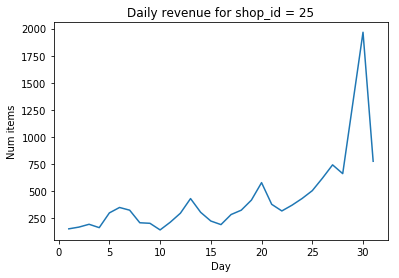

Current answer for task total_num_items_sold_var is: 117167.702299


In [29]:
shop_id = 25

total_num_items_sold =  transactions_25_grouped.item_cnt_day.sum() # YOUR CODE GOES HERE
days = transactions_25_grouped.day.unique() # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var =  (np.var(total_num_items_sold , ddof=1)) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [30]:
STUDENT_EMAIL = 'diegonavarroflorez@gmail.com'
STUDENT_TOKEN = '179cwzbtw2GIgrrx'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: (12, 6675)
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [32]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

TypeError: argument of type 'NoneType' is not iterable

Well done! :)